In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels
import sklearn.metrics

In [39]:
ogauge = pd.read_excel(r'C:\Users\Ronny\Desktop\Project_2022\Ogauge_testing\Ranging46_5bar.xls')

In [40]:
ogauge.head(-5)

,Time,PRESSURE
0,13:00:02,5.02
1,13:00:03,5.01
2,13:00:04,5.02
3,13:00:05,5.02
4,13:00:06,5.02
...,...,...
2734,13:59:49,5.01
2735,13:59:50,5.01
2736,13:59:51,5.01
2737,13:59:52,5.01


In [41]:
ogauge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      2744 non-null   object 
 1   PRESSURE  2744 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.0+ KB


### Forecasting using Moving Average

In [42]:
ogauge['mavg'] = ogauge['PRESSURE'].rolling(window=12).mean().shift(1)
ogauge

,Time,PRESSURE,mavg
0,13:00:02,5.02,NaN
1,13:00:03,5.01,NaN
2,13:00:04,5.02,NaN
3,13:00:05,5.02,NaN
4,13:00:06,5.02,NaN
...,...,...,...
2739,13:59:54,5.01,5.01
2740,13:59:55,5.01,5.01
2741,13:59:58,5.01,5.01
2742,13:59:59,5.02,5.01


### to diplay upto 2 decimal use pd.options.display.float_format= '{:.2f}'.format

In [43]:
pd.options.display.float_format= '{:.2f}'.format
ogauge

,Time,PRESSURE,mavg
0,13:00:02,5.02,NaN
1,13:00:03,5.01,NaN
2,13:00:04,5.02,NaN
3,13:00:05,5.02,NaN
4,13:00:06,5.02,NaN
...,...,...,...
2739,13:59:54,5.01,5.01
2740,13:59:55,5.01,5.01
2741,13:59:58,5.01,5.01
2742,13:59:59,5.02,5.01


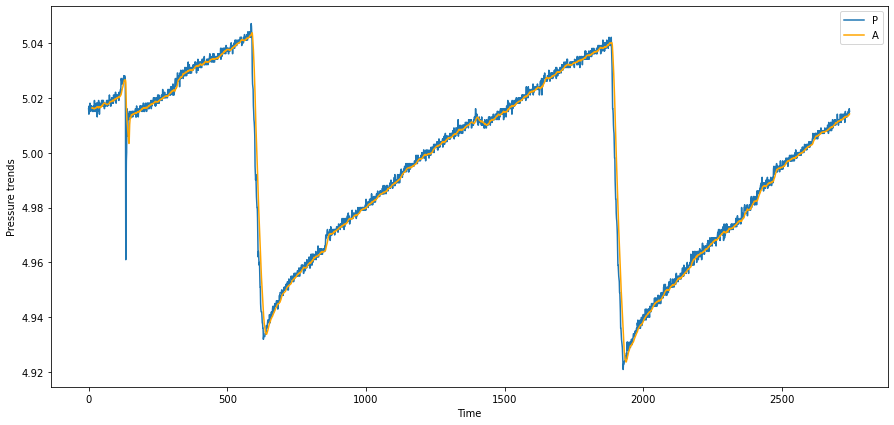

In [44]:
plt.figure( figsize=(15,7))
plt.xlabel( "Time" )
plt.ylabel( "Pressure trends" )
plt.plot( ogauge['PRESSURE'][0:3000] );
plt.plot( ogauge['mavg'][0:3000], color='orange' );
plt.legend('PA');

### MAPE and RMSE

In [45]:
def get_mape(actual, predicted): 
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

get_mape( ogauge['PRESSURE'][40:].values, 
          ogauge['mavg'][40:].values)

0.03

In [46]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error( ogauge['PRESSURE'][36:].values, 
                            ogauge['mavg'][36:].values))

0.003700320926483176

### Exponential smoothing

In [47]:
ogauge

,Time,PRESSURE,mavg
0,13:00:02,5.02,NaN
1,13:00:03,5.01,NaN
2,13:00:04,5.02,NaN
3,13:00:05,5.02,NaN
4,13:00:06,5.02,NaN
...,...,...,...
2739,13:59:54,5.01,5.01
2740,13:59:55,5.01,5.01
2741,13:59:58,5.01,5.01
2742,13:59:59,5.02,5.01


In [48]:
ogauge['ewm'] = ogauge['PRESSURE'].ewm(alpha=0.2).mean()
ogauge

,Time,PRESSURE,mavg,ewm
0,13:00:02,5.02,NaN,5.02
1,13:00:03,5.01,NaN,5.01
2,13:00:04,5.02,NaN,5.02
3,13:00:05,5.02,NaN,5.02
4,13:00:06,5.02,NaN,5.02
...,...,...,...,...
2739,13:59:54,5.01,5.01,5.01
2740,13:59:55,5.01,5.01,5.01
2741,13:59:58,5.01,5.01,5.01
2742,13:59:59,5.02,5.01,5.01


In [49]:
pd.options.display.float_format= '{:.2f}'.format

In [50]:
MAPE=get_mape( ogauge['PRESSURE'][40:].values, 
          ogauge['ewm'][40:].values)
RMSE=np.sqrt(mean_squared_error( ogauge['PRESSURE'][36:].values, 
                            ogauge['ewm'][36:].values))
MAPE,RMSE

(0.02, 0.0023969714296658458)

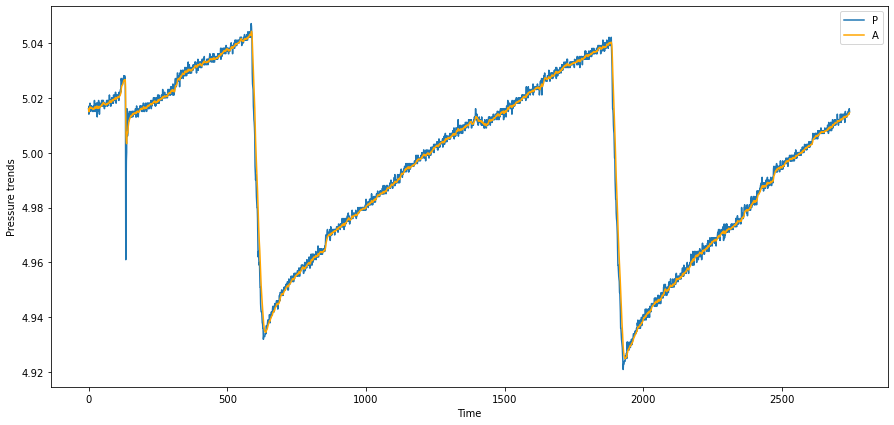

In [52]:
plt.figure( figsize=(15,7))
plt.xlabel( "Time" )
plt.ylabel( "Pressure trends" )
plt.plot( ogauge['PRESSURE'][0:3000] );
plt.plot( ogauge['ewm'][0:3000], color='orange' );
plt.legend('PA');

### We can decompose time-series data into trend,seasonal,cyclical and residual components

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

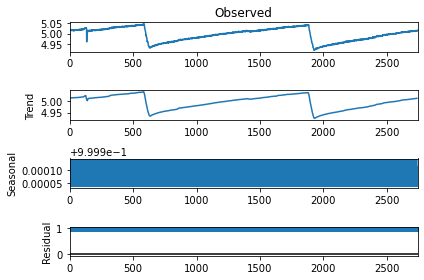

In [54]:
ts_decompose = seasonal_decompose(np.array(ogauge['PRESSURE']), model="multiplicative", period=12)
ts_plot = ts_decompose.plot()

In [55]:
ogauge['seasonal'] = ts_decompose.seasonal
ogauge['trend'] = ts_decompose.trend
ogauge['residual'] = ts_decompose.resid
ogauge

,Time,PRESSURE,mavg,ewm,seasonal,trend,residual
0,13:00:02,5.02,NaN,5.02,1.00,NaN,NaN
1,13:00:03,5.01,NaN,5.01,1.00,NaN,NaN
2,13:00:04,5.02,NaN,5.02,1.00,NaN,NaN
3,13:00:05,5.02,NaN,5.02,1.00,NaN,NaN
4,13:00:06,5.02,NaN,5.02,1.00,NaN,NaN
...,...,...,...,...,...,...,...
2739,13:59:54,5.01,5.01,5.01,1.00,NaN,NaN
2740,13:59:55,5.01,5.01,5.01,1.00,NaN,NaN
2741,13:59:58,5.01,5.01,5.01,1.00,NaN,NaN
2742,13:59:59,5.02,5.01,5.01,1.00,NaN,NaN


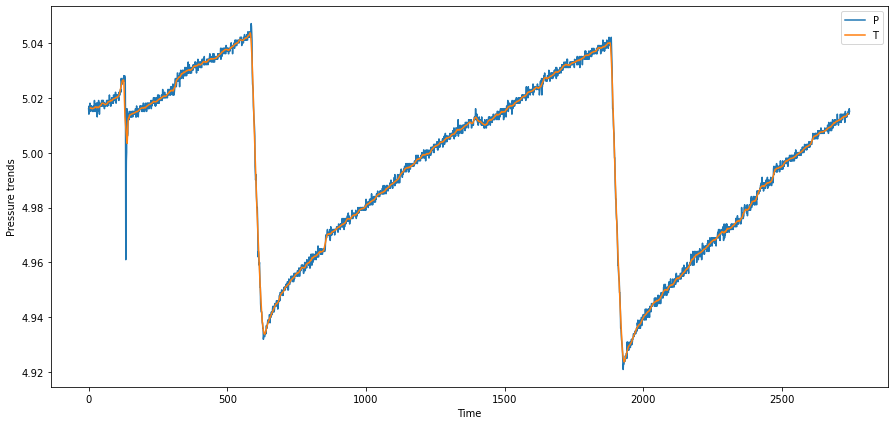

In [56]:
plt.figure( figsize=(15,7))
plt.xlabel( "Time" )
plt.ylabel( "Pressure trends" )
plt.plot( ogauge['PRESSURE'][0:3000], );
plt.plot( ogauge['trend'][0:3000]);
plt.legend('PT')

### Stationarity test

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
def adfuller_test( ts ):
    adfuller_result = adfuller( ts, autolag=None )
    adfuller_out = pd.Series(adfuller_result[0:4], 
                         index=['Test Statistic',
                                'p-value',
                                'Lags Used',
                                'Number of Observations Used'])
    print( adfuller_out )

In [59]:
adfuller_test(ogauge.PRESSURE)

Test Statistic                  -3.01
p-value                          0.03
Lags Used                       28.00
Number of Observations Used   2715.00
dtype: float64


### p value <=0.05 
therefore we can reject the null hypothesis and can go with alternative hypothesis.

In [60]:
def test_stationarity(timeseries):
    
    movingAverage = timeseries.rolling(window=12).mean()
    #Variance is equal to the average squared deviations from the mean
    #Standard deviation is square root of Variancs
    movingSTD = timeseries.rolling(window=12).std()
    
    plt.figure( figsize=(15,7))
    plt.xlabel( "Time" )
    plt.ylabel( "Pressure trends" )
    #plt.plot(timeseries, color='red', label='Original')
    plt.plot(movingAverage, color='green', label='Rolling Mean')
    plt.plot(movingSTD, color='BLUE', label='Rolling Std')
    plt.legend()

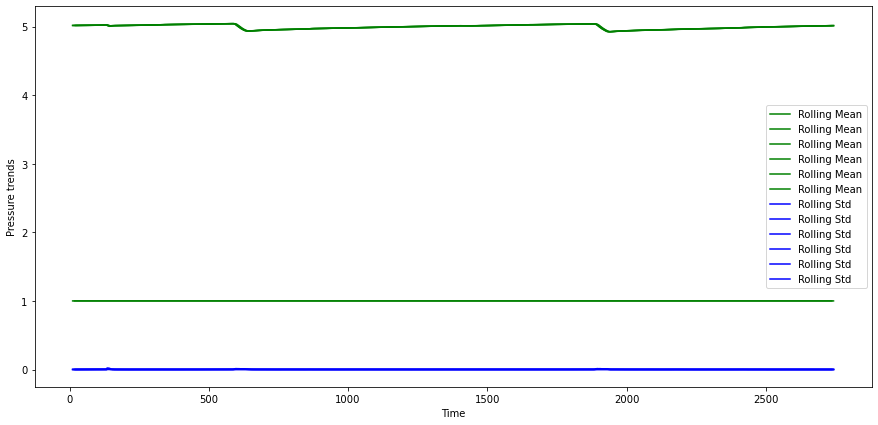

In [61]:
test_stationarity(ogauge)

# Checking the optimal performing model 

In [62]:
# Create Training and Test
train = ogauge.PRESSURE[:1500]
test = ogauge.PRESSURE[1500:]

In [63]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14055.861, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13992.647, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14039.465, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14049.423, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13994.647, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14052.146, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14054.547, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14056.514, Time=1.45 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-14054.236, Time=1.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-14052.228, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-14058.509, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14051.422, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-14056.543, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-14056.231, Time=0.28 sec
 ARIM

In [64]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [65]:
'''model = AutoReg(train, lags=29)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f', 'expected=%f' %(predictions[i],test[i]))
rmse =sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()'''

"model = AutoReg(train, lags=29)\nmodel_fit = model.fit()\npredictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)\nfor i in range(len(predictions)):\n    print('predicted=%f', 'expected=%f' %(predictions[i],test[i]))\nrmse =sqrt(mean_squared_error(test,predictions))\nprint('Test RMSE: %.3f' %rmse)\n\npyplot.plot(test)\npyplot.plot(predictions, color='red')\npyplot.show()"

In [66]:
arima = ARIMA( train, 
              order = (0,1,2))
autoarima_model = arima.fit()
autoarima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
=====================================================================
Model:              ARIMA            BIC:                 -14035.4825
Dependent Variable: D.PRESSURE       Log-Likelihood:      7032.4     
Date:               2022-01-02 14:13 Scale:               1.0000     
No. Observations:   1499             Method:              css-mle    
Df Model:           3                Sample:              1          
Df Residuals:       1496                                  0          
Converged:          1.0000           S.D. of innovations: 0.002      
No. Iterations:     22.0000          HQIC:                -14048.816 
AIC:                -14056.7327                                      
----------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
----------------------------------------------------------------------
const             -0.0000    0.0000  -0.0076  0.9940  -0.0001   0.0001
ma.L1.D.PRESSURE  -0.2017    0.0259  -7.7944  0.0000  -0.2524  -0.1510
ma.L2.D.PRESSURE  -0.0792    0.0263  -3.0091  0.0026  -0.1307  -0.0276
------------------------------------------------------------------------------
                  Real           Imaginary          Modulus          Frequency
------------------------------------------------------------------------------
MA.1             2.5018             0.0000           2.5018             0.0000
MA.2            -5.0496             0.0000           5.0496             0.5000
=====================================================================

"""

In [72]:
fc, se, conf = autoarima_model.forecast(1244, alpha=0.05)

In [73]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

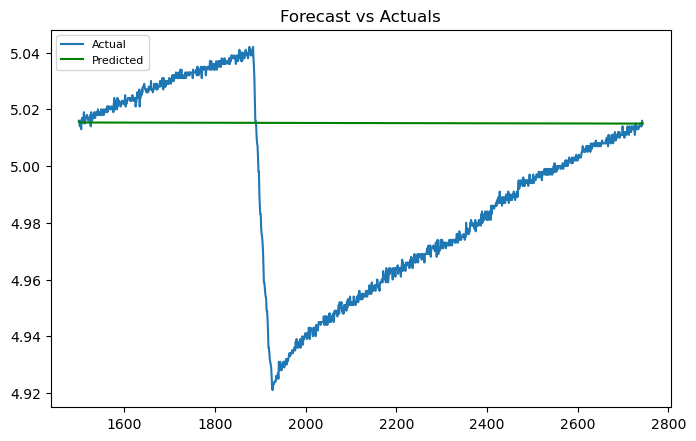

In [77]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Predicted', color='green')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [78]:
fc

array([5.01557984, 5.01535738, 5.01535706, ..., 5.01497083, 5.01497051,
       5.0149702 ])

### Checking forecast accuracy

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf

In [80]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.006375900023093204,
 'me': 0.023234863428232496,
 'mae': 0.03168013395584598,
 'mpe': 0.004697838622686605,
 'rmse': 0.04015268425949133,
 'acf1': 0.998291709915987,
 'corr': 0.25127979595377364,
 'minmax': 0.006313943140043632}

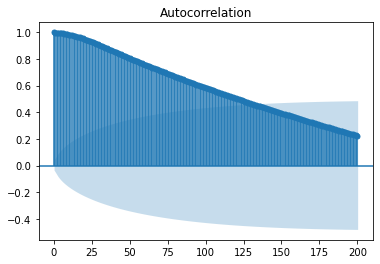

In [81]:
acf_plot = plot_acf( ogauge.PRESSURE,lags=200)

The Autocorrelation plot for the data is:


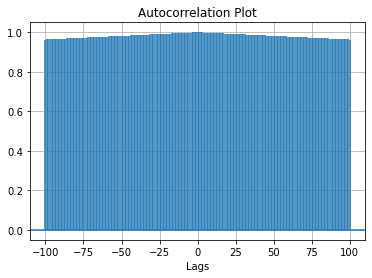

In [82]:
   
# Adding plot title.
plt.title("Autocorrelation Plot")
 
# Providing x-axis name.
plt.xlabel("Lags")
 
# Plotting the Autocorrelation plot.
plt.acorr(ogauge.PRESSURE, maxlags = 100)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()

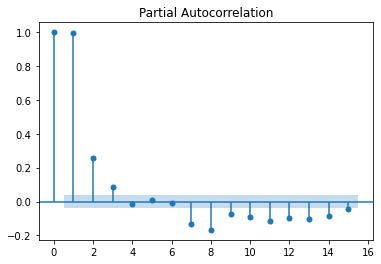

In [83]:
pacf_plot = plot_pacf( ogauge.PRESSURE, lags=15 )

In [84]:
get_mape(test.values,fc)

0.64

In [85]:
from pandas import Series

In [86]:
mean = ogauge['PRESSURE'].mean()
print("Mean:",mean)
#Variance is measure of linear dependence between two random variables
Variance = ogauge['PRESSURE'].var()
print("Variance:",Variance)
SD = ogauge['PRESSURE'].std()
print("SD:",SD)

Mean: 4.996474125364427
Variance: 0.0009316901796940804
SD: 0.030523600372401687


In [87]:
from scipy.stats import norm
import seaborn as sns

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

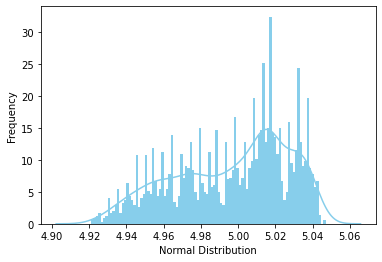

In [88]:
ax = sns.distplot(ogauge['PRESSURE'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency',)

In [89]:
#ACVF is covariance of a variable with itself at some other time

import numpy as np

Xi = np.array(ogauge['PRESSURE'])
N = np.size(Xi)
k = 5
Xs = np.average(Xi)

def autocovariance(Xi, N, k, Xs):
    autoCov = 0
    for i in np.arange(0, N-k):
        autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
    return (1/(N-1))*autoCov

def autocorrelation():
    return autocovariance(Xi, N, k, Xs) / autocovariance(Xi, N, 0, Xs)

print("ACVF:", autocovariance(Xi, N, k, Xs))
print("AVF:", autocorrelation())

ACVF: 0.000924529354446687
AVF: 0.9923141561396082
